In [161]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Helper functions

In [162]:
def show_img_hsv_mask_result(img, img_hsv, mask, result):
    fontsize = 10
    f, ax = plt.subplots(1, 4, figsize=(20, 20))
    
    ax[0].imshow(img)
    ax[0].set_title(f'RGB', fontsize=fontsize)
    
    ax[1].imshow(img_hsv)
    ax[1].set_title(f'HSV', fontsize=fontsize)
    
    ax[2].imshow(mask, cmap='gray')
    ax[2].set_title(f'Mask', fontsize=fontsize)
    
    ax[3].imshow(result)
    ax[3].set_title(f'Result', fontsize=fontsize)
    

### HSV boundaries

For black color we don't need to worry about hue or saturation, only value.

In [163]:
# lower boundary
lower_black = np.array([0, 0, 0])

# upper boundary
upper_black = np.array([180, 255, 100])

### Color filter

In [164]:
images_path = '../data/from_phone_original/'

/tmp/ipykernel_648509/810588850.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(1, 4, figsize=(20, 20))


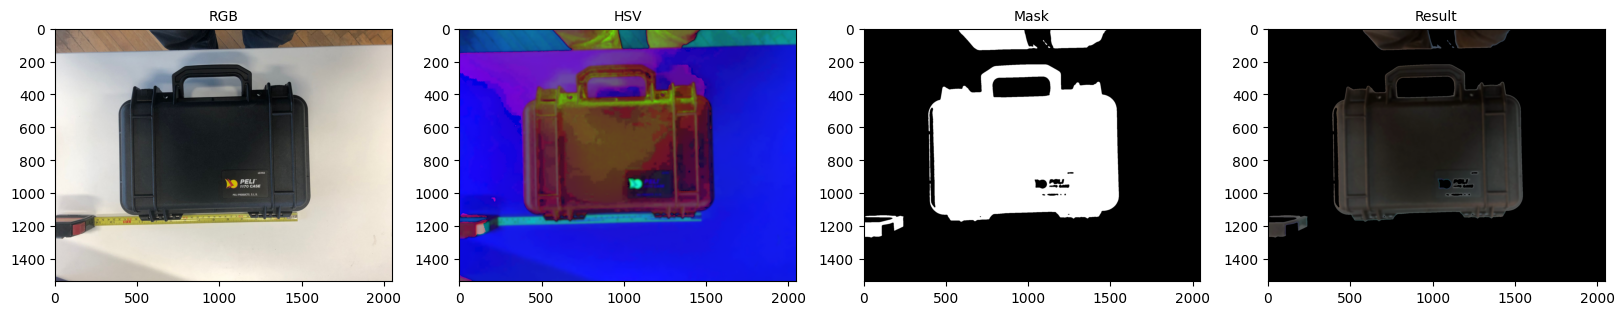

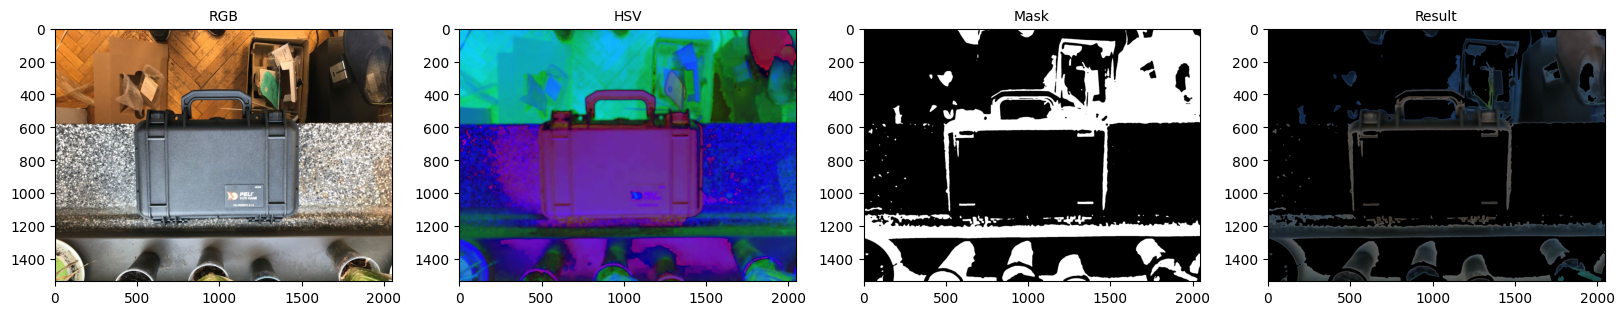

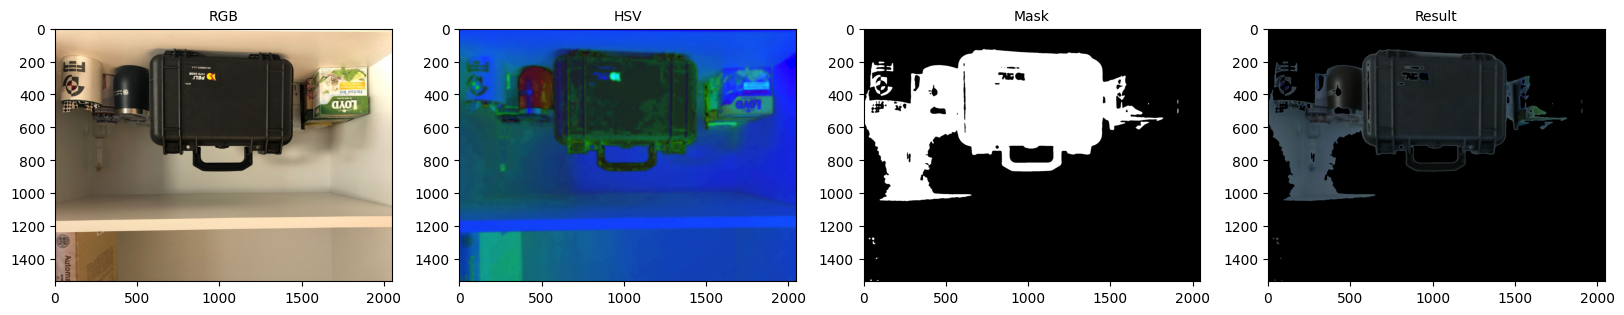

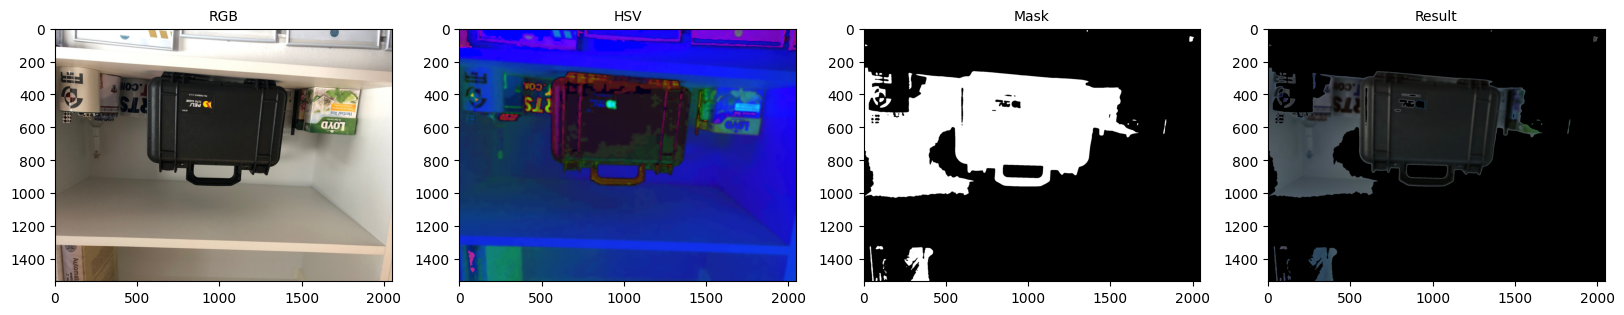

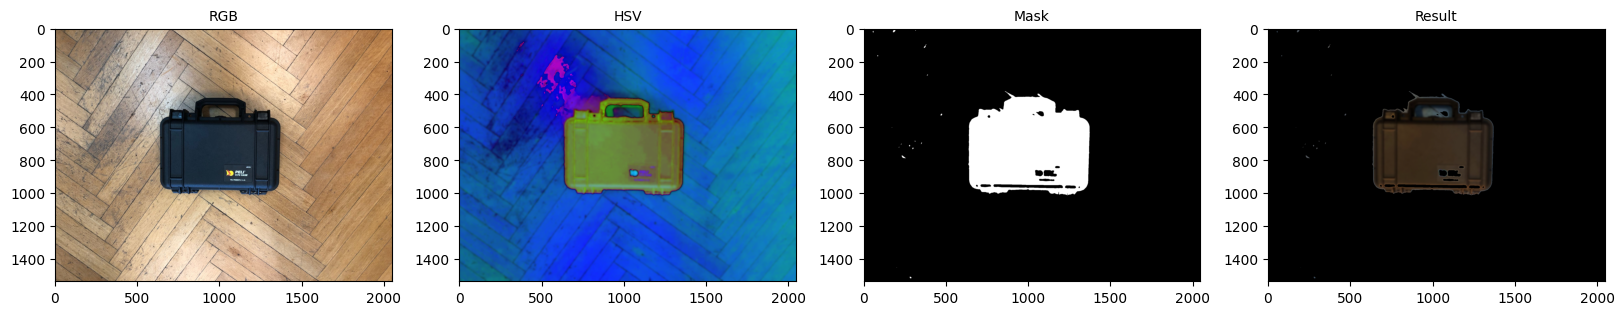

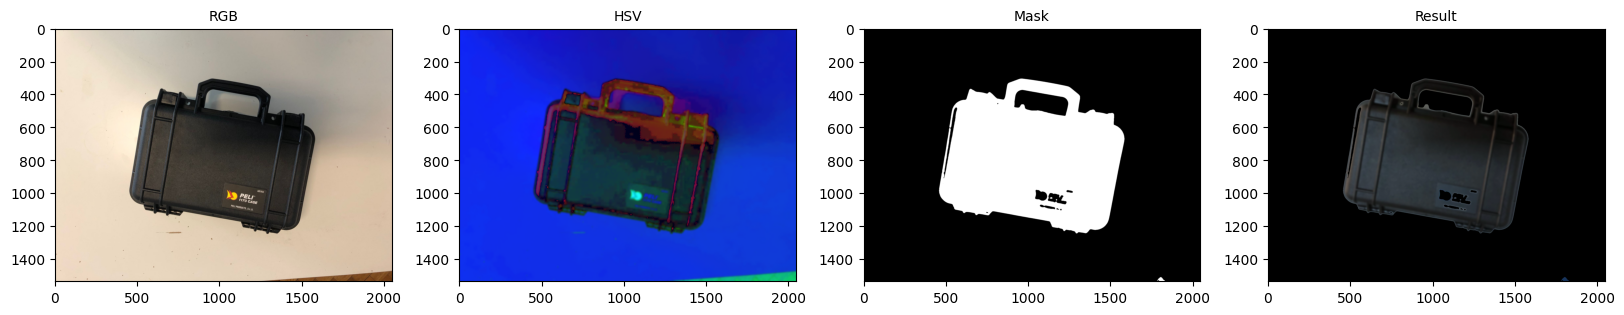

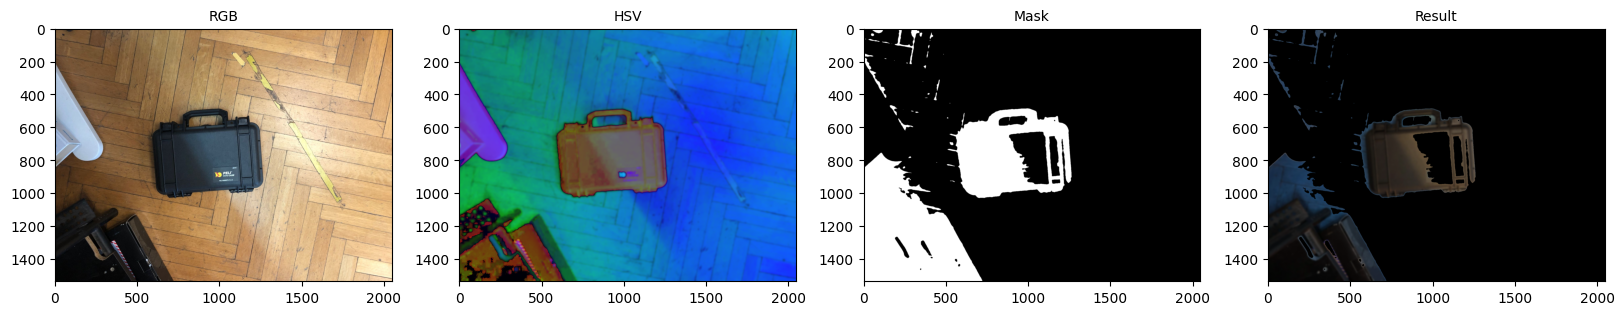

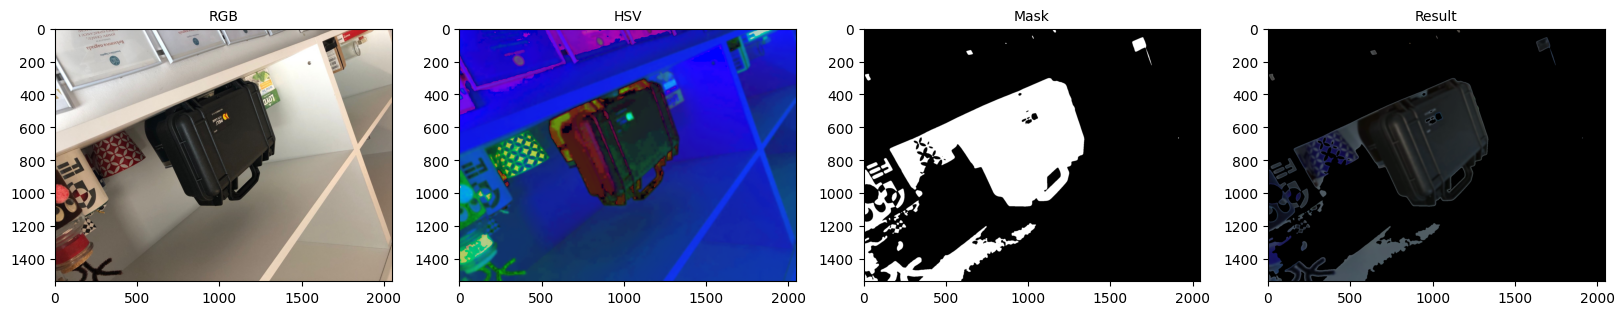

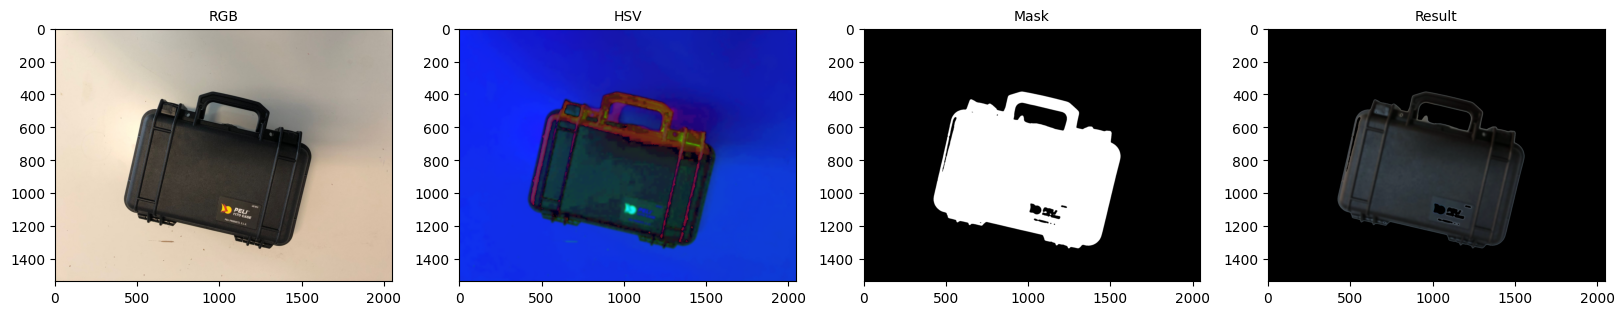

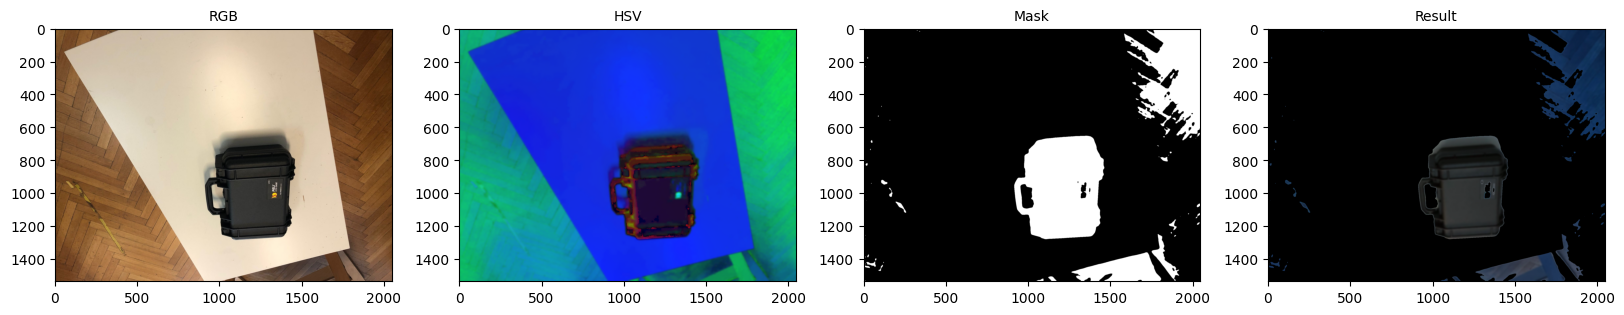

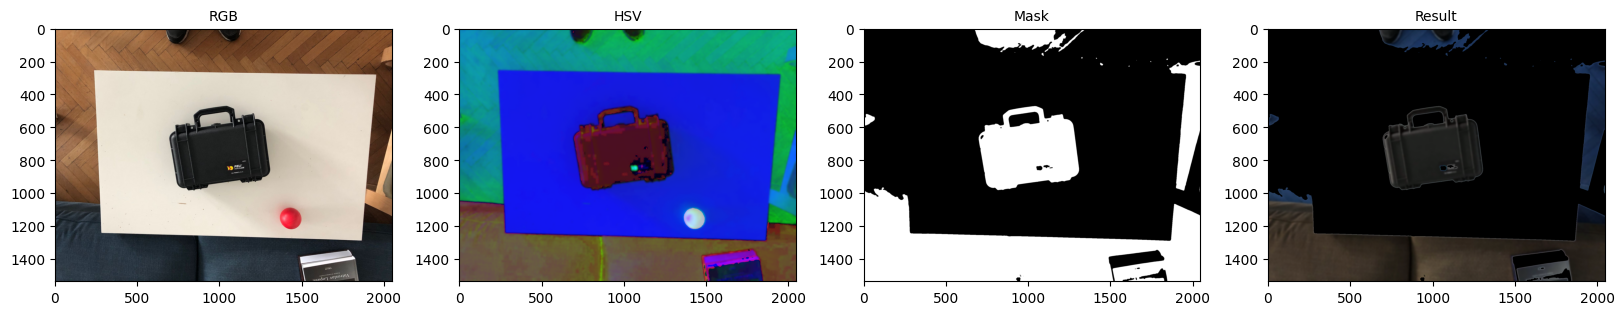

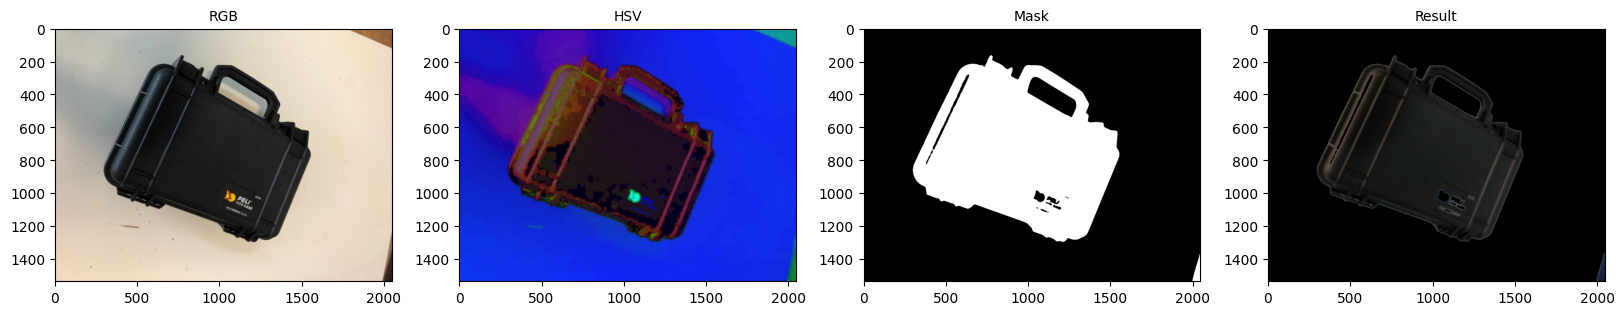

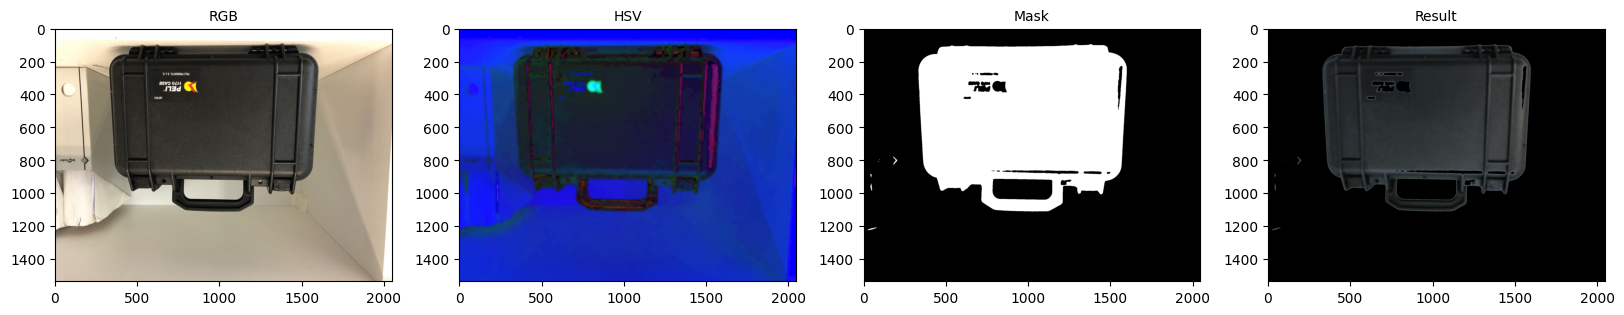

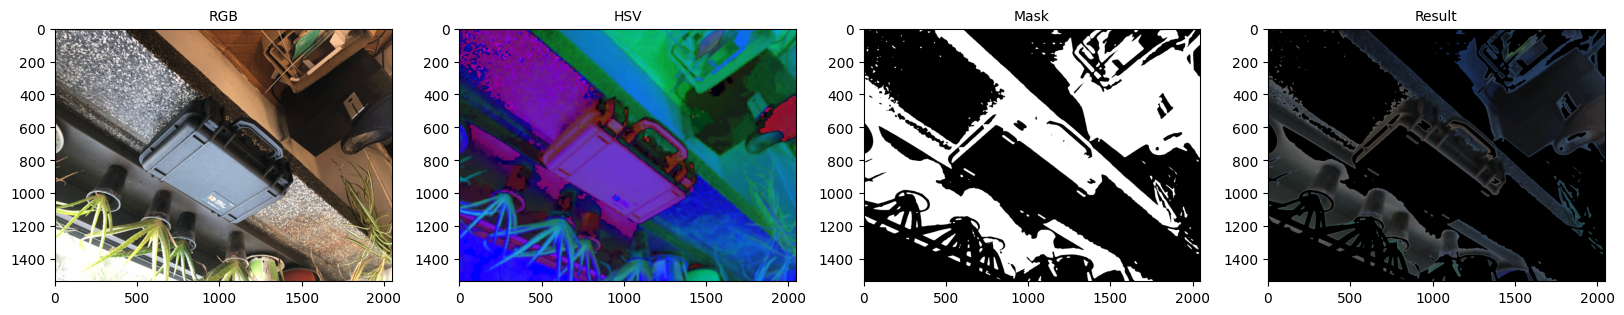

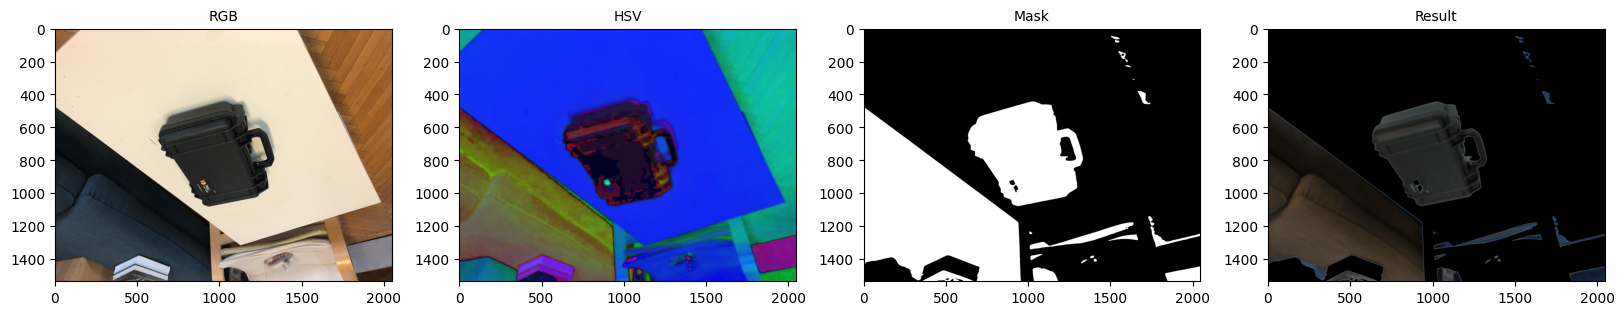

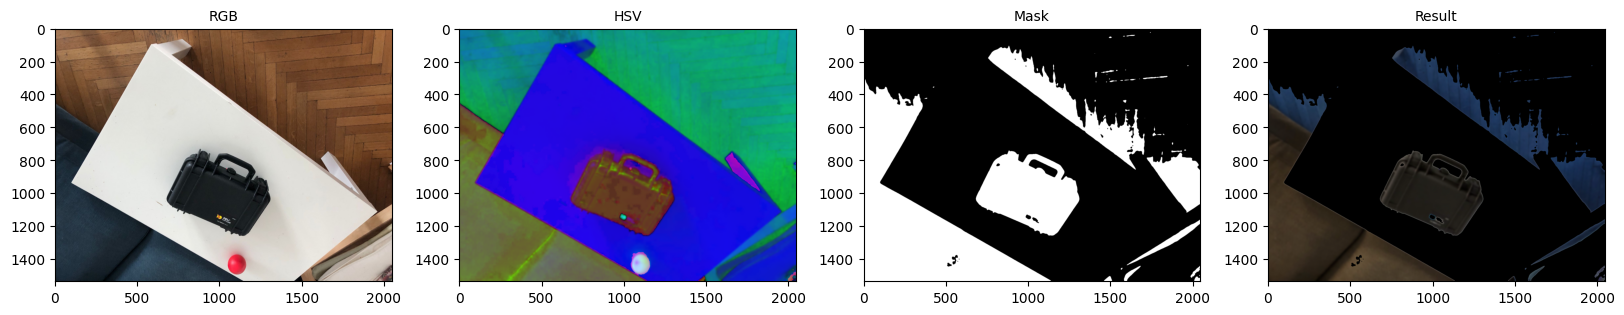

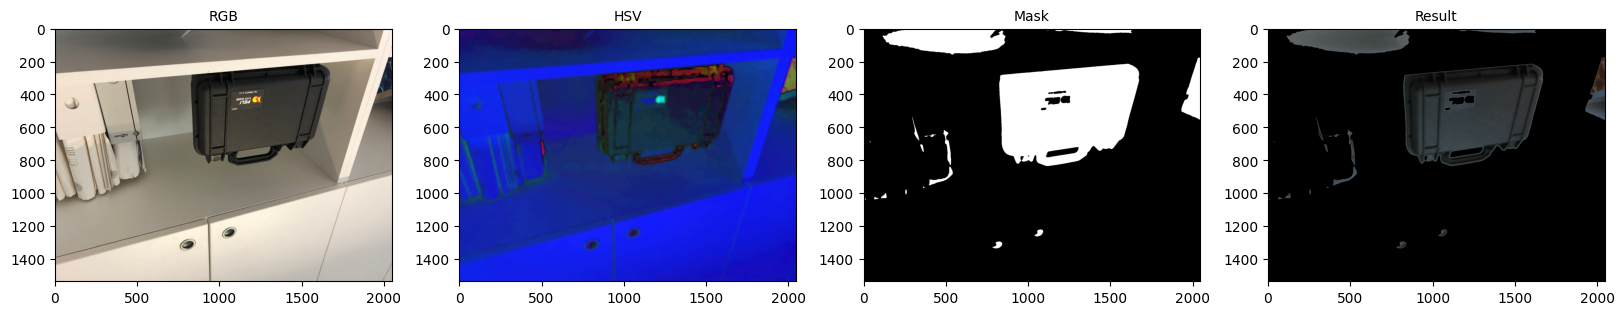

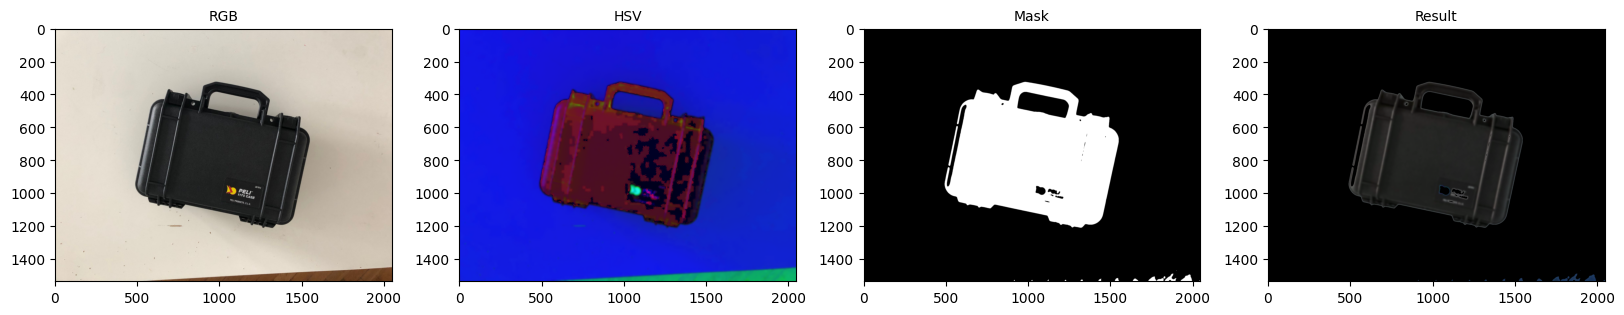

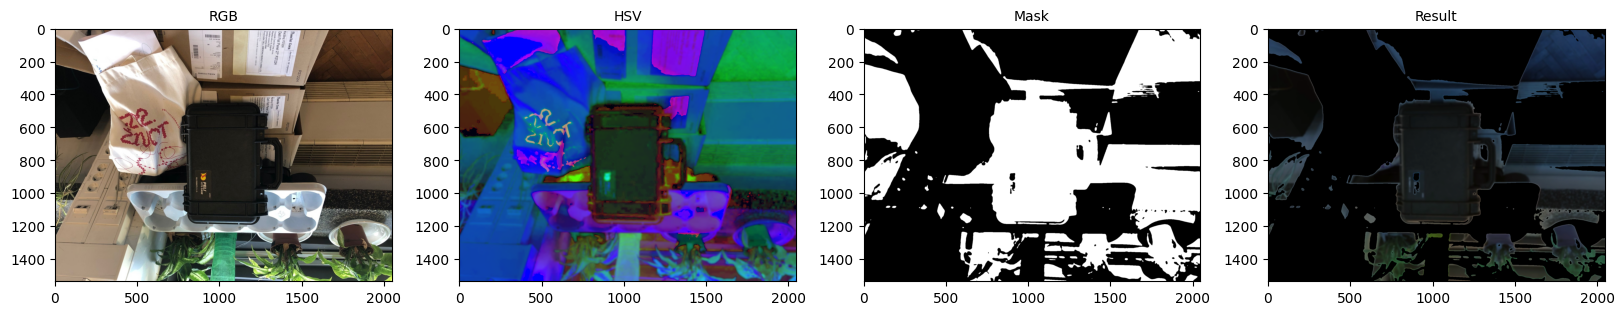

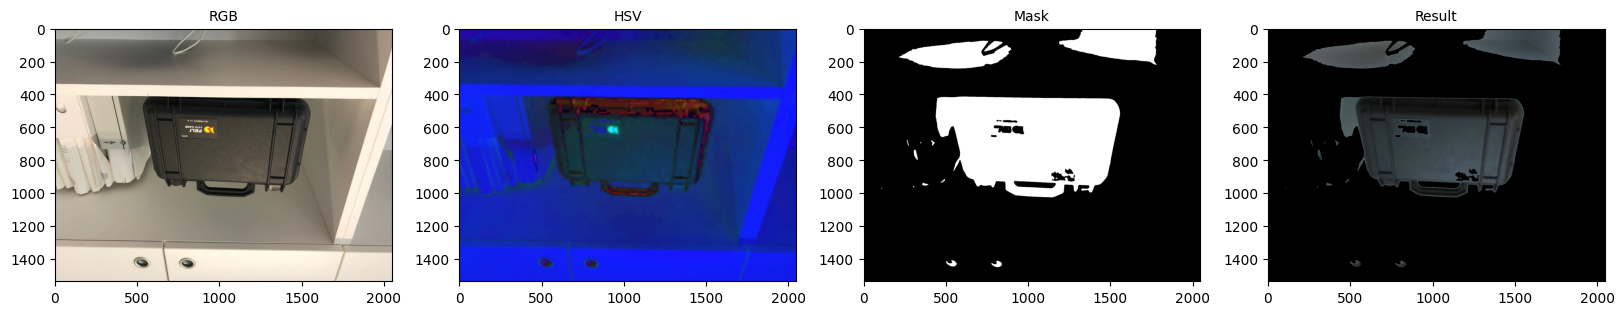

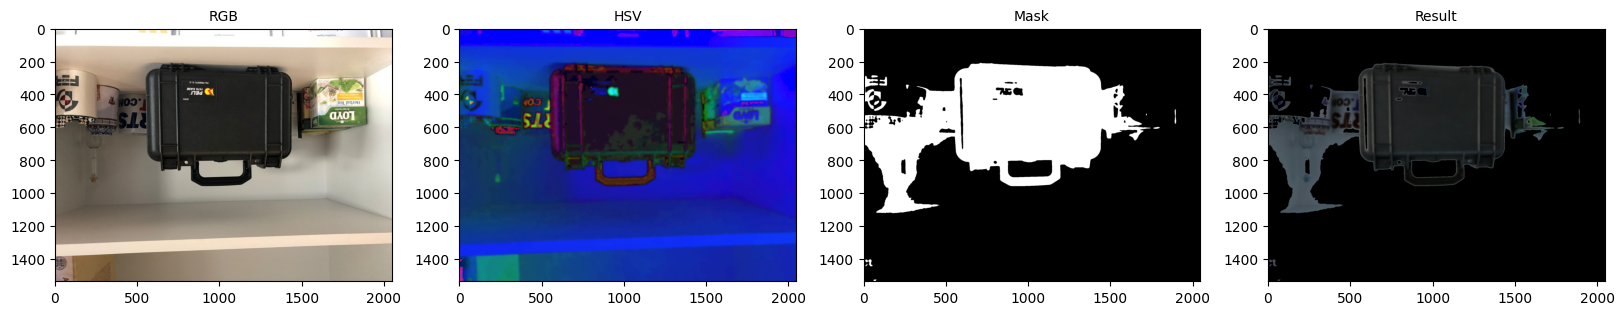

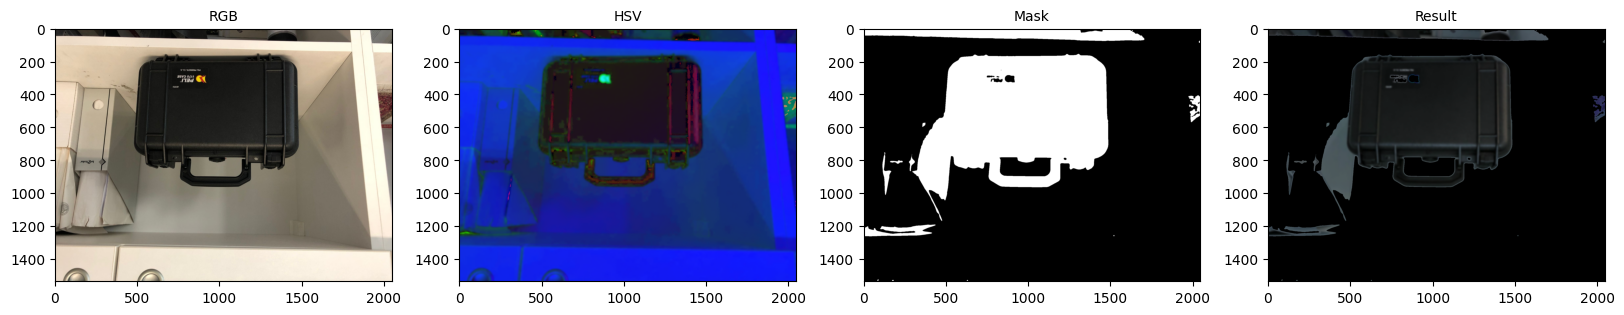

In [181]:
for image in os.listdir(images_path):
    # load image
    img = cv2.imread(images_path + image)
    # blurring
    blurred = cv2.GaussianBlur(img,(25,25),0)
    # convert image to HSV format
    img_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    # find mask based on boundaries value
    mask = cv2.inRange(img_hsv, lower_black, upper_black)
    result = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
    result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
    orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot results
    show_img_hsv_mask_result(orig_img, img_hsv, mask, result)

### Blurring

In [205]:
img = cv2.imread(images_path + '0001.jpeg')
# blurring
blurred = cv2.GaussianBlur(img,(25,25),0)
# convert image to HSV format
img_hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
# find mask based on boundaries value
mask = cv2.inRange(img_hsv, lower_black, upper_black)
result = cv2.bitwise_and(img_hsv, img_hsv, mask = mask)
result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)
orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

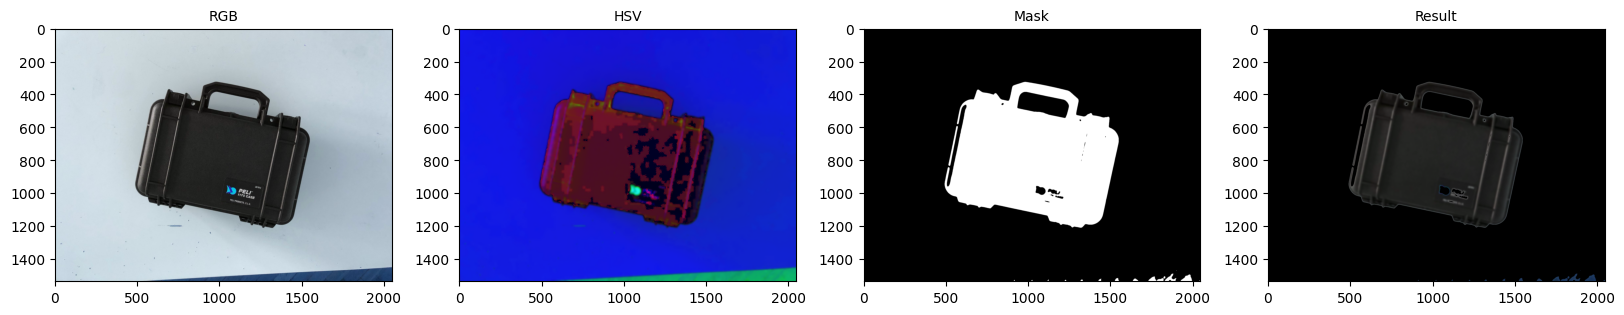

In [206]:
show_img_hsv_mask_result(img, img_hsv, mask, result)

In [207]:
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [208]:
result_cp = result.copy()
for i in range(len(contours)):
    cv2.drawContours(result_cp, contours, i, (255, 0, 0), 3)

In [209]:
# find convex hull
hull_list = []
for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    hull_list.append(hull)

for i in range(len(contours)):
    cv2.drawContours(result_cp, hull_list, i, (0, 255, 0), 3)

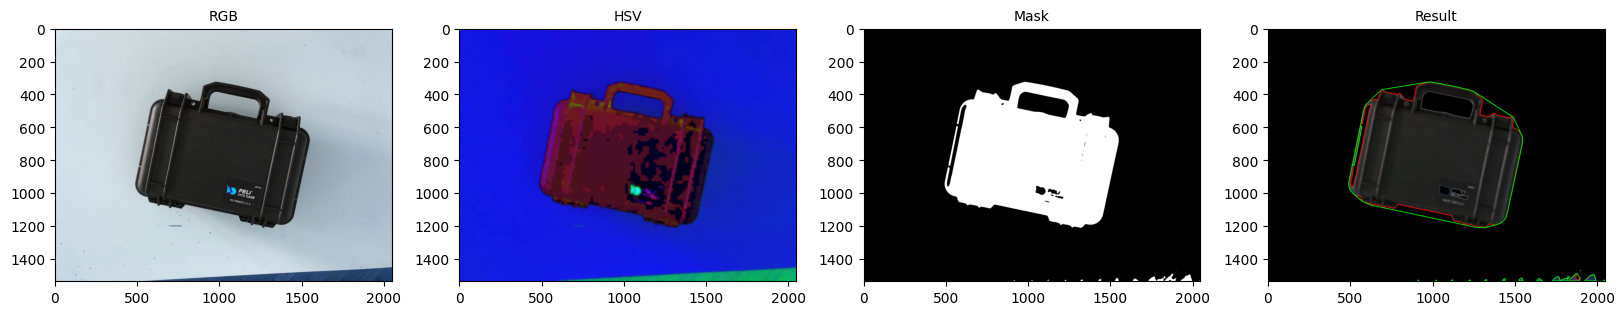

In [210]:
show_img_hsv_mask_result(img, img_hsv, mask, result_cp)